# Optimal policies per seed

In this notebook, we load the results from optimal policies with their corresponding reference scenario and plot the KPI pathways.

In [2]:
#Setting directory

import os
try:
    os.chdir(os.path.join(os.getcwd(), '/Users/palokbiswas/OneDrive/AI_NL_PhD_2022/CURRENT_22-23-RICE/PyRICE_Max_New/PyRICE_2022')) # '.' if the path is to current folder
    print(os.getcwd())
except:
    pass

/Users/palokbiswas/Library/CloudStorage/OneDrive-Personal/AI_NL_PhD_2022/CURRENT_22-23-RICE/PyRICE_Max_New/PyRICE_2022


In [3]:
from dmdu.general.visualization import plot_simple_kpi_pathways_with_seeds
#import os
import pandas as pd
from ema_workbench import load_results

## Loading the file names

In [16]:
target_directory = os.path.join(
    os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),
    'CURRENT_22-23-RICE',
    'PyRICE_Max_New',
    'PyRICE_2022',
    'dmdu',
    'policydiscovery',
    'data',
    'experiments'
)
files = sorted(os.listdir(target_directory))
files

['SUFFICIENTARIAN_AGGREGATED_seed_0_reference_0',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_1',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_2',
 'SUFFICIENTARIAN_AGGREGATED_seed_0_reference_3',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_0',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_1',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_2',
 'SUFFICIENTARIAN_AGGREGATED_seed_1_reference_3',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_0',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_1',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_2',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_0_reference_3',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_0',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_1',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_2',
 'SUFFICIENTARIAN_DISAGGREGATED_seed_1_reference_3',
 'UTILITARIAN_AGGREGATED_seed_0_reference_0',
 'UTILITARIAN_AGGREGATED_seed_0_reference_1',
 'UTILITARIAN_AGGREGATED_seed_0_reference_2',
 'UTILITARIAN_AGGREGATED_seed_0_refere

## Loading results

In [12]:
seeds_dict = {}
previous_problem_formulation = ''
problem_formulations = {}

for idx, file in enumerate(files):

    # print(f'previous_problem_formulation: {previous_problem_formulation}')

    # Define path to load data from
    path = os.path.join(target_directory, file)

    # Splitting terms
    terms = file.split('_')
    problem_formulation = terms[0] + '_' + terms[1]
    # print(f'problem_formulation: {problem_formulation}\n')
    seed_idx = terms[3]
    reference_idx = terms[-1]

    # Load results
    _, outcomes = load_results(path)
    outcomes = pd.DataFrame(outcomes)

    if previous_problem_formulation != problem_formulation:
        seeds_dict = {seed_idx: outcomes}
        previous_problem_formulation = problem_formulation
    else:
        seeds_dict[seed_idx] = pd.concat([seeds_dict[seed_idx], outcomes]) if seed_idx in seeds_dict else outcomes

    # Save data
    # seeds_dict[seed_idx] = pd.concat([seeds_dict[seed_idx], outcomes]) if seed_idx in seeds_dict else outcomes
    problem_formulations[problem_formulation] = seeds_dict


In [15]:
outcomes.head()

,Population above damage threshold 2005,Population above damage threshold 2015,Population above damage threshold 2025,Population above damage threshold 2035,Population above damage threshold 2045,Population above damage threshold 2055,Population above damage threshold 2065,Population above damage threshold 2075,Population above damage threshold 2085,Population above damage threshold 2095,...,Total Output 2215,Total Output 2225,Total Output 2235,Total Output 2245,Total Output 2255,Total Output 2265,Total Output 2275,Total Output 2285,Total Output 2295,Total Output 2305
0,0.0,0.0,0.0,0.0,0.0,0.000000,1668.244058,1727.049484,3041.851495,3063.869921,...,1368.236096,1467.029086,1568.956399,1673.735516,1787.381614,1901.940215,2017.673712,2135.039882,2254.485687,2371.848461
1,0.0,0.0,0.0,0.0,0.0,0.000000,1668.244058,1727.049484,3041.851495,3063.869921,...,1365.734943,1464.349704,1566.092292,1670.681056,1784.120395,1898.470465,2013.993245,2131.145714,2250.374041,2367.523163
2,0.0,0.0,0.0,0.0,0.0,0.000000,1668.244058,1727.049484,3041.851495,3063.869921,...,1346.830806,1444.098592,1544.445057,1647.595134,1759.471768,1872.245731,1986.175871,2101.713143,2219.297721,2334.832007
3,0.0,0.0,0.0,0.0,0.0,0.000000,1668.244058,1727.049484,3041.851495,3063.869921,...,1365.355419,1463.943135,1565.657693,1670.217574,1783.625539,1897.943967,2013.434772,2130.554815,2249.750141,2366.866844
4,0.0,0.0,0.0,0.0,0.0,1611.440936,3207.858416,4547.997154,6039.763036,6058.243592,...,1258.328551,1351.567248,1448.069644,1547.464039,1655.323816,1764.047594,1873.743950,1984.625290,2096.157358,2205.447270


## Visualization of KPI pathways, grouped by seeds

In [13]:
for problem_formulation, seeds_dict in problem_formulations.items():
    len0 = len(seeds_dict['0'])
    len1 = len(seeds_dict['1'])
    print(f'{problem_formulation}\n{len0}, {len1}\n')

SUFFICIENTARIAN_AGGREGATED
901, 925



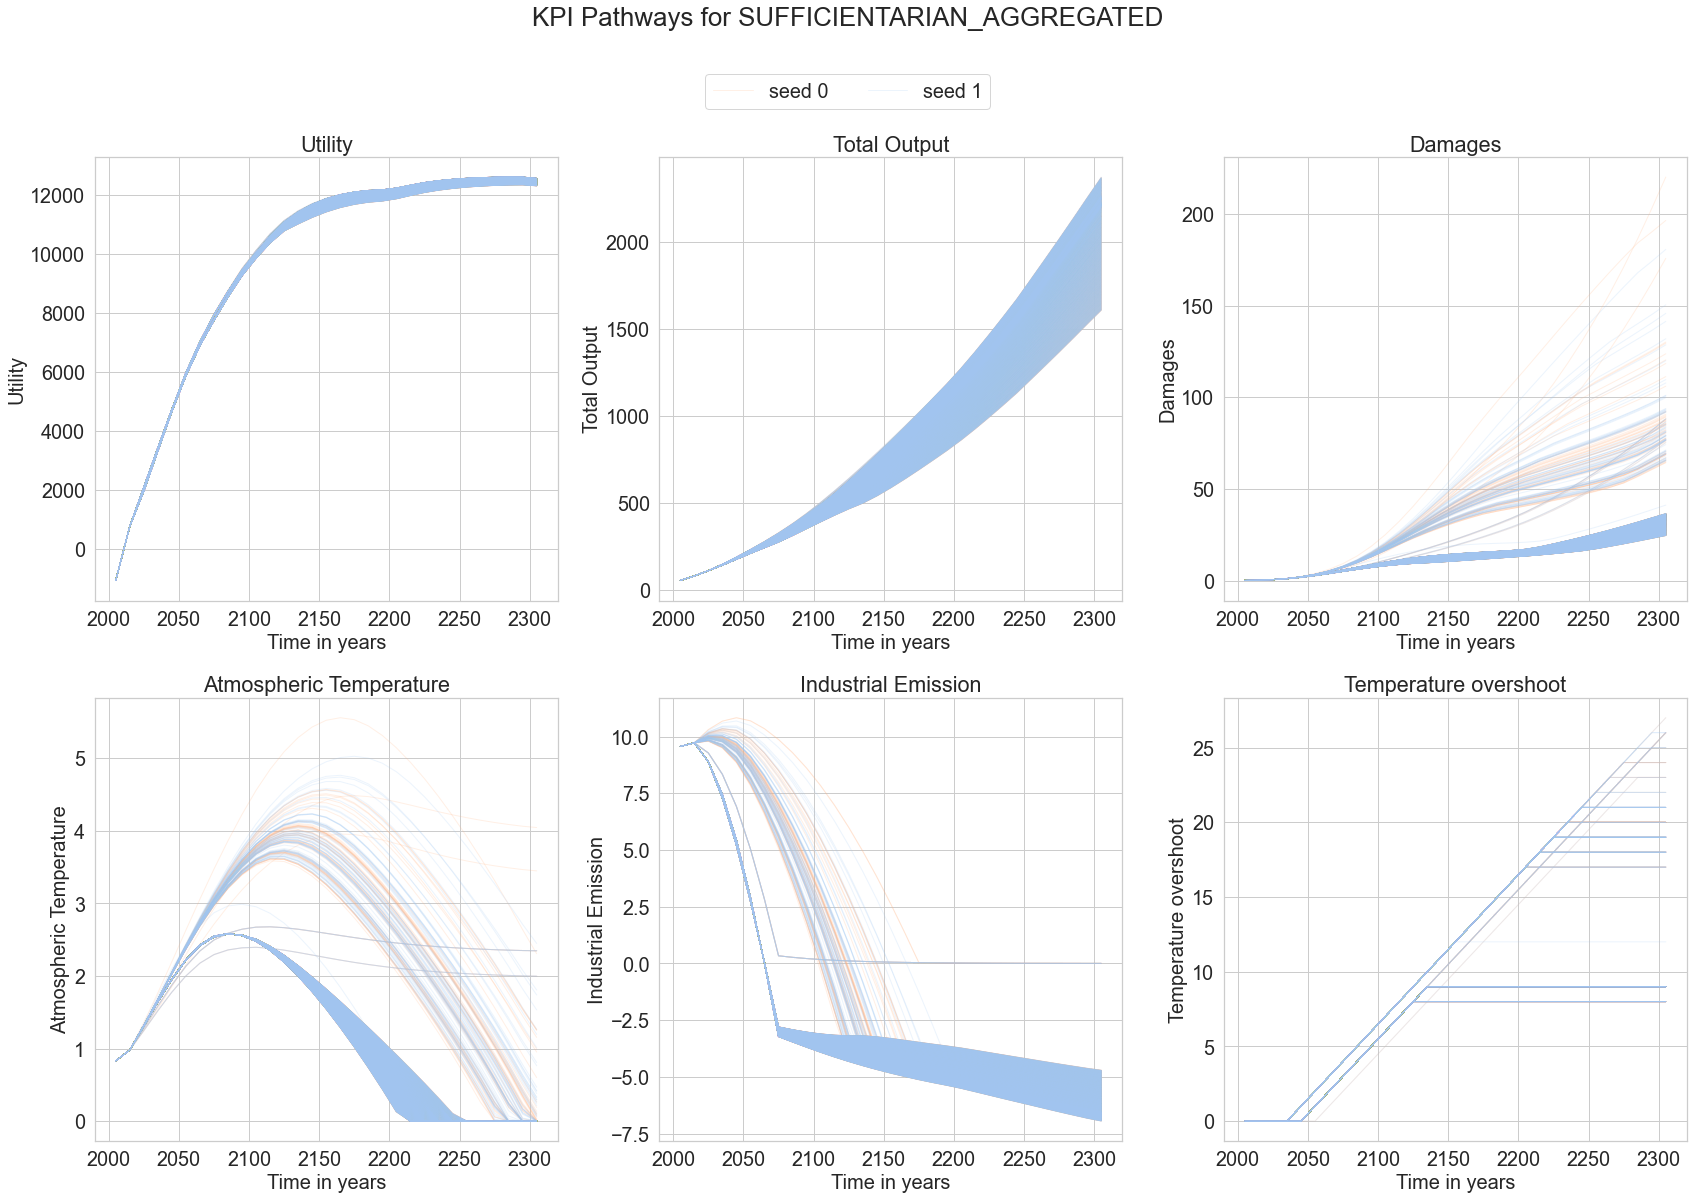

In [14]:
for problem_formulation, seeds_dict in problem_formulations.items():
    plot_simple_kpi_pathways_with_seeds(
        seeds_dict=seeds_dict,
        problem_formulation=problem_formulation,
        saving=False,
        file_name=f'seed_analysis_{problem_formulation}'
    )